In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model 
import warnings
warnings.filterwarnings('ignore')

Reading Dataset

In [8]:
dataset = r'C:\Users\admin dell\Desktop\Completed projects\Chess Pieces\dataset'

Data Augmentation

In [9]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.3,
    shear_range=0.3,
    rotation_range=30,
    horizontal_flip=True
)

In [10]:
train_generator = datagen.flow_from_directory(
    dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


Found 240 images belonging to 12 classes.


Found 60 images belonging to 12 classes.


Model Building

In [11]:
conv_base = DenseNet121(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

for layer in conv_base.layers[:-50]:
    layer.trainable = False

x = conv_base.output  
x = GlobalAveragePooling2D()(x) 
x = Dense(256, activation='relu')(x) 
output = Dense(12, activation='softmax')(x)  

model = Model(inputs=conv_base.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(train_generator, validation_data=validation_generator, epochs=20, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.0903 - loss: 2.9698 - val_accuracy: 0.1667 - val_loss: 2.4511 - learning_rate: 1.0000e-04
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.3283 - loss: 2.1660 - val_accuracy: 0.2500 - val_loss: 2.1312 - learning_rate: 1.0000e-04
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.4895 - loss: 1.7908 - val_accuracy: 0.4000 - val_loss: 1.9166 - learning_rate: 1.0000e-04
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.6940 - loss: 1.5087 - val_accuracy: 0.4667 - val_loss: 1.6782 - learning_rate: 1.0000e-04
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8169 - loss: 1.2563 - val_accuracy: 0.5500 - val_loss: 1.5134 - learning_rate: 1.0000e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8113 - loss: 1.0972 - val_accuracy: 0.7000 - val_loss: 1.3164 - learning_rate: 1.0000e-04
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8083 - loss: 0.9832 - val_

In [14]:
model.save('chess-1.keras')

Image Testing

In [13]:
def testing_image(filepath):
    img = image.load_img(filepath, target_size = (224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array/255
    op = ['Black bishop', 'Black king', 'Black knight', 'Black pawn', 'Black queen', 'Black rook', 'White bishop', 'White king', 'White knight', 'White pawn', 'White queen', 'White rook']
    prediction = model.predict(img_array)
    prediction_class = np.argmax(prediction, axis=1)
    prediction_class_index = prediction_class[0]
    prediction_class_label = op[prediction_class_index]
    plt.imshow(img)
    plt.title(f"Prediction: {prediction_class_label}")
    plt.axis('off')
    plt.show()

Test Image 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


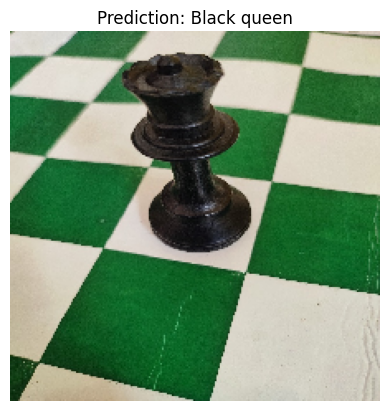

In [16]:
test1 = r'C:\Users\admin dell\Desktop\Completed projects\Chess Pieces\dataset\Black queen\resized_1691059495468.jpg' 
testing_image(test1)

Test image 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


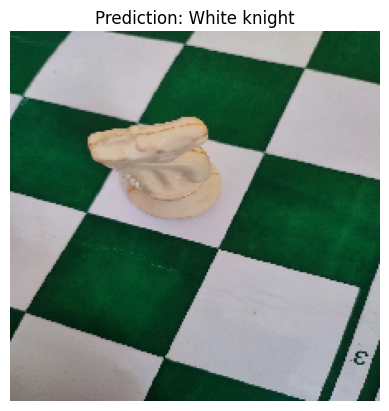

In [17]:
test2 = r'C:\Users\admin dell\Desktop\Completed projects\Chess Pieces\dataset\White knight\resized_1691059395907.jpg'
testing_image(test2)

Testing from random Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


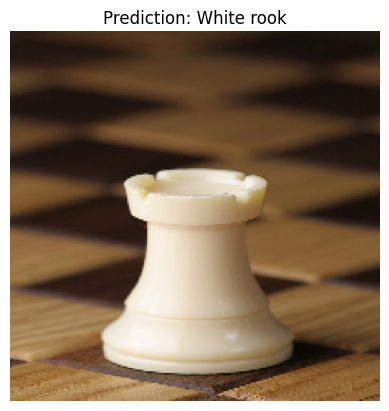

In [18]:
sample = r'C:\Users\admin dell\Desktop\demo.webp'
testing_image(sample)

In [19]:
import keras
model_sample = keras.saving.load_model('chess-1.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


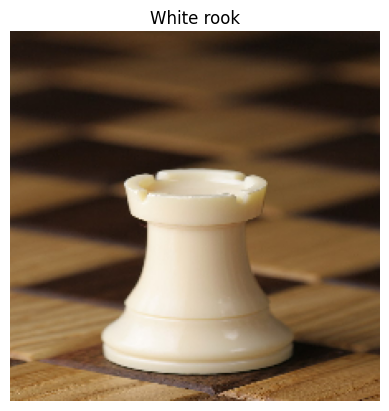

In [22]:
model_test = load_model('chess-1.keras')
img = image.load_img(r'C:\Users\admin dell\Desktop\demo.webp', target_size = (224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array/255
op = ['Black bishop', 'Black king', 'Black knight', 'Black pawn', 'Black queen', 'Black rook', 'White bishop', 'White king', 'White knight', 'White pawn', 'White queen', 'White rook']
prediction = model.predict(img_array)
prediction_class_index = np.argmax(prediction)
predicted_class_label = op[prediction_class_index]
plt.imshow(img)
plt.title(predicted_class_label)
plt.axis('off')
plt.show()